# Принятие решений в бизнесе

Мы — аналитик крупного интернет-магазина. Мы с помощью отдела маркетринга подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


Для решения задачи нам необходимо выполнить следующие цели:

1) `Загрузить данные и привести их в вид, подходящий для анализа`

2) `Приоритизация гипотез. В данную цель входит 3 подцели`:

•	Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

•	Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

•	Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить причины.


3) `Анализ A/B-теста. В данную цель входит 14 подцелей`:

а) **Постороить графики**:

- Построить график кумулятивной выручки по группам. На основе графика сделать выводы и предположения.

- Построить график кумулятивного среднего чека по группам. На основе графика сделать выводы и предположения.

- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. На основе графика сделать выводы и предположения.

- Построить график кумулятивной конверсии по группам. На основе графика сделать выводы и предположения.

- Построить график относительного изменения кумулятивной конверсии группы B к группе A. На основе графика сделать выводы и предположения.

- Построить точечный график количества заказов по пользователям. На основе графика сделать выводы и предположения.

- Построить 95-й и 99-й перцентили количества заказов на пользователя. На основе полученных данных нужно выбрать границу для определения аномальных пользователей.

- Построить точечный график стоимостей заказов. На основе графика сделать выводы и предположения.

- Посчитайте 95-й и 99-й перцентили стоимости заказов. На основе полученных данных нужно выбрать границу для определения аномальных пользователей.

б) **Посчитать**:

- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. На основе полученных данных сделать выводы и предположения.

- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. На основе полученных данных сделать выводы и предположения.

- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. На основе полученных данных сделать выводы и предположения.

- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. На основе полученных данных сделать выводы и предположения.

в) **Итог**:

- Принять решение по результатам теста и объясните его. Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.


# Шаг 1. Загружаем данные и готовим их к анализу

## Общая работа с данными

Для работы с гипотезами необходима работа с данными. Для работы же сданными нам необходимо с помощью `библиотеки` pandas прочитать датасет. Также импортируем сразу все необходимые модули

In [1]:
# импорт библиотеки pandas
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# чтение файлов с данными и сохранение их в переменных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Создадим собственную функцию для получения общей информации о датасете.

In [3]:
#создаем собственную функцию
def inform(dt):
    class font:
       BOLD = '\033[1m'
       END = '\033[0m'
    print('\n')
    print(font.BOLD + 'Первые пять строк таблицы:' + font.END)
    display(dt.head(5))
    print('\n'*2)
    print(font.BOLD + 'Общая информация о таблице:' + font.END)
    print('\n')
    dt.info()
    print('\n'*2)
    print(font.BOLD + 'Данные таблицы:' + font.END)
    print('\n')
    display(dt.describe())
    print('\n'*2)
    print(f'Количество дубликатов {dt.duplicated().sum()}')

## Датасет hypothesis

In [4]:
#применяем полученную функцию
inform(hypothesis)



Первые пять строк таблицы:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1





Общая информация о таблице:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes



Данные таблицы:




,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000





Количество дубликатов 0


Мы видим, что в датасете `hypothesis` 9 строк, которым соответствуют 9 гипотез. Эти гипотезы мы будем приоритизировать. Для каждой гипотезы определены оценки параметров ICE и RICE. Названия столбцев необходимо привести к хорошему стилю. Пропусков и дубликатов нет. ПРоблем заключается лишь в том, что гипотезы нам не полностью видны. 

Сначала поменяем размер ячейки, чтобы внего уместилась гипотеза. Затем заменим названия столбцев.

In [5]:
#настраиваем размер ячейки
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
#меняем название столбцев
hypothesis.columns =  hypothesis.columns.str.lower()

In [6]:
#смотрим на обновленную таблицу
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Теперь все выглядит прекрасно!

Согласно документации к данным, датасет hypothesis состоит из 5 столбцев:
    
•	`hypothesis` — краткое описание гипотезы;

•	`reach` — охват пользователей по 10-балльной шкале;

•	`impact` — влияние на пользователей по 10-балльной шкале;

•	`confidence` — уверенность в гипотезе по 10-балльной шкале;

•	`efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


## Датасет orders

In [7]:
#применяем полученную функцию
inform(orders)



Первые пять строк таблицы:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B





Общая информация о таблице:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB



Данные таблицы:




,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06





Количество дубликатов 0


Названия не соответсвуют правилам хорошего стиля. Дубликатов и пропусков нет. Нужно будет только дату привести в порядок - к нужному типу данных.

In [8]:
#меняем тип данных
orders['date'] = orders['date'].astype('datetime64[D]')
#переименум столбцы
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId': 'visitor_id'}) 
#смотрим на результат проверки
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Таблица готова к анализу.

Согласно документации к данным, датасет orders состоит из 5 столбцев:

•	`transaction_id` — идентификатор заказа;

•	`visitor_id` — идентификатор пользователя, совершившего заказ;

•	`date` — дата, когда был совершён заказ;

•	`revenue` — выручка заказа;

•	`group` — группа A/B-теста, в которую попал заказ.
   

## Датасет visitors

In [9]:
#применяем полученную функцию
inform(visitors)



Первые пять строк таблицы:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756





Общая информация о таблице:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB



Данные таблицы:




,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000





Количество дубликатов 0


В таблице нет дубликатов и пропусков. Названия таблиц соответствуют правилам хорошего стиля. Проблема только в дате - ей нужен правильный формат.

In [10]:
#меняем тип данных
visitors['date'] = visitors['date'].astype('datetime64[D]')
#смотрим на результат проверки
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Других проблем нет!

Согласно документации к данным, датасет visitors состоит из 3 столбцев:

•	`date` — дата;

•	`group` — группа A/B-теста;

•	`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста
    

Теперь можно переходить к следующему шагу.

Для точности исследования посмотрим, сколько пользователей попали в обе группы.

In [11]:
#пользователи группы A
ordersA = orders.query('group == "A"')['visitor_id']
#пользователи группы B
ordersB = orders.query('group == "B"')
#выделяем пользователей, который входили в обе группы
problem =ordersB.query('visitor_id in @ordersA')
#считаем количество уникальных пользователей.
problem['visitor_id'].nunique()

58

In [12]:
#оставляем только уникальных пользователей.
problem = problem['visitor_id'].unique()

Всего 58 пользователей попали сразу в 2 группы. Для чисоты исслдований можно от них избавиться, чтобы они не искажали результат исследования.

In [13]:
#удаляем повторяющихся пользователей
orders = orders.query('visitor_id not in @problem')

Теперь можно работать с данными

# Шаг 2. Приоритизируем гипотезы

## Применяем фреймворк ICE для приоритизации гипотез. Сортируем их по убыванию приоритета.



Напомним, что ICE рассчитывается по следующей формуле:
    
**(impact * confidence) / efforts**

Посчитаем ICE для гипотез. Добавим полученные значения ICE в  `hypothesis` . Новый столбец назовите ICE. 

In [14]:
#считаем ICE
hypothesis['ICE'] =round((( hypothesis['impact'] * hypothesis['confidence'] ) / hypothesis['efforts']), 1) 
#сортируем гипотезы по убыванию приоритета
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Самые перспективные:

1) Мы видим, что самой перспективной гипотезой является **9 гипотеза**, которая говорит нам о том, что нужно запустить  акцию, дающую скидку на товар в день рождения. (ICE равен 16.2)

2) На втором месте по перспективности расположилась **1 гипотеза**, которая предлагает добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.(ICE равен 13.3)

3) Тройку закрывает **8 гипотеза**, которая предлагает добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.(ICE равен 11.2)

Данные гипотезы попали в тройку лидеров, поскольку они являются лидерами по таким критериям, как влияние и уверенность, которые заметно выше критерия, характеризующего усилия, которые необходимо будет затратить на проверку гипотезы.

Самые неудачные:
    
1) Самой неперспективной оказалась **5 гипотеза**, говорящая нам о том, что изменение цвета фона главной страницы для увеличения вовлеченности пользователей поможет нам увеличить выручку.(ICE равен 1.0)

2) Второй по неперспективности следует **4 гипотеза**, предлагающая нам изменить структуру категорий, чтобы увеличит конверсию, т.к. пользователи быстрее найдут нужный товар. (ICE равен 1.0)

3) Тройку неудачников замыкает **6 гипотеза**, которая говорит нам о том, что выручку увеличит добавление страницы отзывов клиентов о магазине, чтобы позволит увеличить количество заказов (ICE равен 1.3)

Сами гипотезы могут быть и неплохими, однако усилий на их проверку будет потрачено больше, чем критерий, отражающий то, насколько сильно изменение повлияет на охваченных пользователей. данных гипотез и уверенность в оценках параметров.

## Применяем фреймворк RICE для приоритизации гипотез. Сортируем их по убыванию приоритета.


Напомним, что RICE рассчитывается по следующей формуле:

**(impact * reach * confidence) / efforts**

In [15]:
#считаем RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
#сортируем гипотезы по убыванию приоритета
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самые перспективные:

1) Мы видим, что самой перспективной гипотезой является **8 гипотеза**, которая говорит нам о том, что нужно добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. (RICE равен 112.0)

2) На втором месте по перспективности расположилась **3 гипотеза**, которая предлагает добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. (RICE равен 56.0)

3) Тройку закрывает **1 гипотеза**, которая предлагает добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.(RICE равен 40.0)

4) Третье место вместе с 1 гипотезой разделяет **7 гипотеза**, которая предлагает показывать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.(RICE равен 40.0)

Данные гипотезы попали в тройку лидеров, поскольку они являются лидерами по таким критериям, как влияние и уверенность, а также охват пользователей, которые заметно выше критерия, характеризующего усилия, которые необходимо будет затратить на проверку гипотезы.

Самые неудачные:

1) Самой неперспективной оказалась **5 гипотеза**, говорящая нам о том, что изменение цвета фона главной страницы для увеличения вовлеченности пользователей поможет нам увеличить выручку.(RICE равен 3.0)

2) Второй по неперспективности следует **6 гипотеза**, предлагающая нам добавить страницу отзывов клиентов о магазине, чтобы  увеличить количество заказов. (RICE равен 4.0)

3) Тройку неудачников замыкает **2 гипотеза**, которая говорит нам о том, что выручку увеличит запуск собственной службы доставки, чтобы сократит срок доставки заказов. (ICE равен 1.3)

Сами гипотезы могут быть и неплохими, однако усилий на их проверку будет потрачено больше, чем критерий, отражающий то, насколько сильно изменение повлияет на охваченных пользователей данных гипотез, критерий, отражающий скольких пользователей затронет изменение, которое вы хотите внести и уверенность в оценках параметров.

## Указываем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясняем причины.

Мы видим, что приоритизация гипотез не сильно изменилось при смене способа приоритизации задач.

В частности, оба метода показали, что самыми перспективными гипотезами являются 8 и 1. Самыми же неперспективными являются гипотезы 5 и 6.

Метод ICE в тройку перспективных влкючил еще и 9 гипотезу, которая при методе RICE занимает 5 место из 9. Метод RICE в тройку перспективных включил еще 7 и 3 гипотезы, которые для метода ICE занимают 4 и 5 место.

Метод ICE в тройку неперспективных влкючил еще и 4 гипотезу, которая при методе RICE занимает 6 место и выходит в четверку самых неперспективных. Метод RICE в тройку перспективных включил еще и 2 гипотезу, которые для метода ICE занимают 5 место.

В целом результаты у обоих методов схожи. Различия обяъсняются тем, что при использовании способа RICE учитывается так же и параметр reach, который характеризует то, скольких пользователей затронет изменение, которое вы хотите внести. Этот параметр смог сделать более приоритетными некоторые гипотезы, в результате чего и изменились топы. Способ ICE же не учитывает данный параметр, поэтому некоторые гипотезы, реализация которых смогла бы затронуть большое количество пользователей, просто оставались без внимания.

# Шаг 3. Анализ A/B-теста

## 1. Построим график кумулятивной выручки по группам. На основе графика сделаем выводы и предположения.


Для того, чтобы это сделать нам нужно сначала получить датасет с уникальными парами "группа - дата". После этого мы создадим датсаес с помощью датасета orders с накоплением количества транзакций, пользователей и суммированием выручки с каждым днем. После этого мы сделаем то же самое с датасетом visitors. Затем мы объединим оба датасета и разделим их на группы A и B, по которым уже построим график.

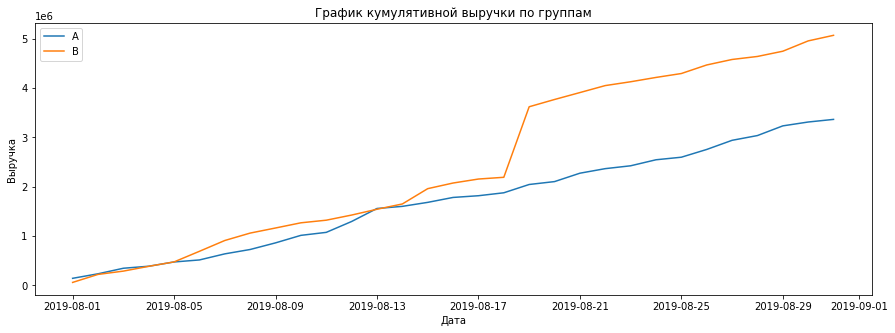

In [16]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
#создаем датасет с уникальными парами даты и группы
datesGroups = orders[['date', 'group']].drop_duplicates()
#получаем кумулятивную выручку, количество заказов и пользователей для каждой даты и группы
ordersAggregated = datesGroups.apply(lambda x: 
                                     orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date': 'max','group': 'max','transaction_id': 'nunique','visitor_id': 'nunique','revenue': 'sum',}),
                                     axis=1,).sort_values(by=['date', 'group'])

#получаем кумулятивное количество посетителей
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), 
                                       axis=1,).sort_values(by=['date', 'group'])
#объединяем датасеты
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименовываем столбцы
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.show()

### Вывод

Мы видим, что примерно до середины теста сегменты имели одинаковый объем выручки. Однако примерно в середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Возможно, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить. Однако стоит отметить, что сегмент B никогда по выручке не проигрывал сегменту A, поэтому можно предположить, что при устранении выбросов результат не сильно изменится.

## 2. Построим  график кумулятивного среднего чека по группам. На основе графика сделаем выводы и предположения.

Чтобы сделать это нам необходимо поделить выручку для каждой даты на количество заказов в эту дату для каждой из групп. Так мы получим средний чек для каждой из дат. По полученным данным уже будем строить графики.

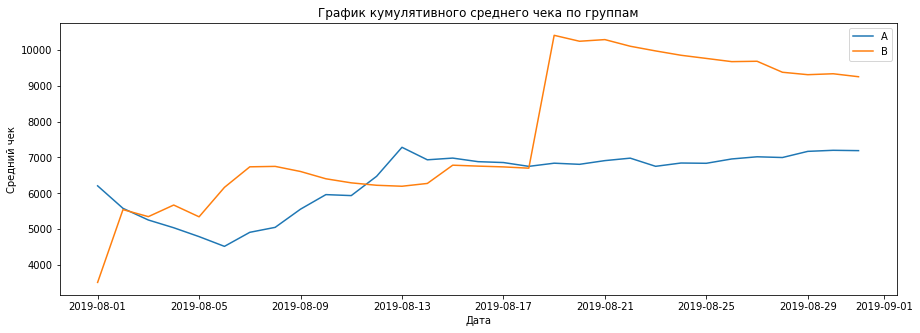

In [17]:
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
#делим выручку на количество заказов для каждой даты в группе A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
#делим выручку на количество заказов для каждой даты в группе B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.show()

### Вывод

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты. Мы видим, что средний чек для сегмента B был в некоторые даты ниже, чем для сегмента A. Так же мы видим, резкий скачок среднего чека в середине теста, что в принципе означает наличие аномально больших заказов. При этом в дальнейшем средний чек для сегмента B начинает снижаться.

## 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. На основе графика сделаем выводы и предположения.

Чтобы выполнить задание, мы должны объединить таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы итоговая таблица содержала столбцы: `['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']`. 

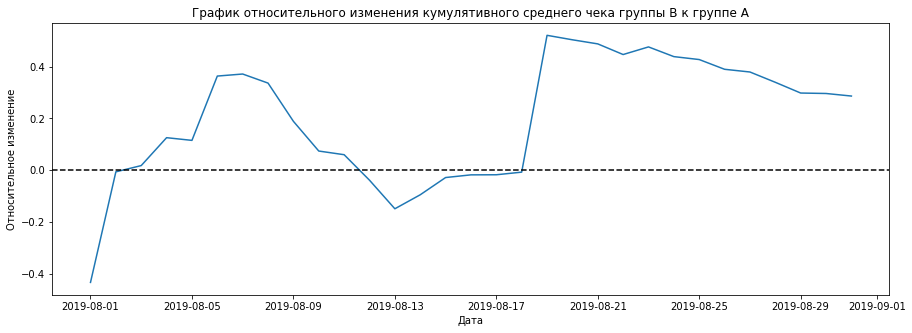

In [18]:
# собираем данные в одном датафрейме, добавляя приписку в виде названия группы
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

### Вывод

Перед нами график относительного изменения кумулятивного среднего чека группы B к группе A. Он показывает то, как менялось отношение кумулятивного среднечего чека группы B к группе A. Мы видим, что результаты теста значительно и резко менялись в несколько дат. Как минимум происходило около 5 резких изменений тенденций отношения. Скорее всего, именно в даты резких изменений были совершены аномальные заказы. Также в середине исследования заметен резкий скачок для группы B.

## 4. Построим график кумулятивной конверсии по группам. На основе графика сделаем выводы и предположения.

Для этого мы добавляем столбец `conversion` в общий датасет для рассчета конверсии (количество заказов делим на количество пользователей). Затем общий датасет мы делим по группам, по которым мы уже строим графики.

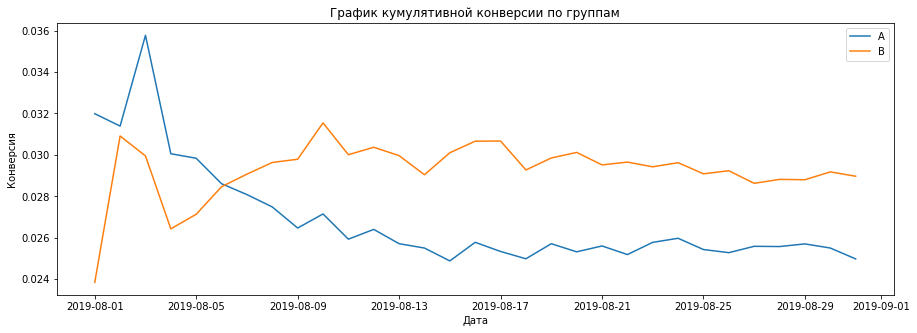

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.show()


### Вывод

В начале теста сегмент A имел намного большую конверсию, чем сегмент B, но затем сегмент A резко упал, после чего оставлался примерно на одном уровне. Сегмент B сначала был заметно меньше сегмента A, затем резко вырос, после резко упал и снова резко вырос, стабилизировавшись к середине теста. Так мы видим, что сегмент B имел большую кумулятивную конверсию, чем сегмент А практически на протяжении всего теста. График подтвержадет наличие выбросов, от которых желательно избавиться, чтобы объективно оценивать результаты теста.
Конверсия сегмента A могла иметь аномалии в начале теста, после чего стабилизировалась, в то время как конверсия сегмента B, скорее всего, имела аномалии в середине теста, после чего начала стабилизироваться.

## 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. На основе графика сделаем выводы и предположения.

Для этого мы объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы итоговая таблица содержала столбцы: `['date', 'conversionA', 'conversionB']`. Затем же рассчитаем относительную конверсию, для которой и построим график.

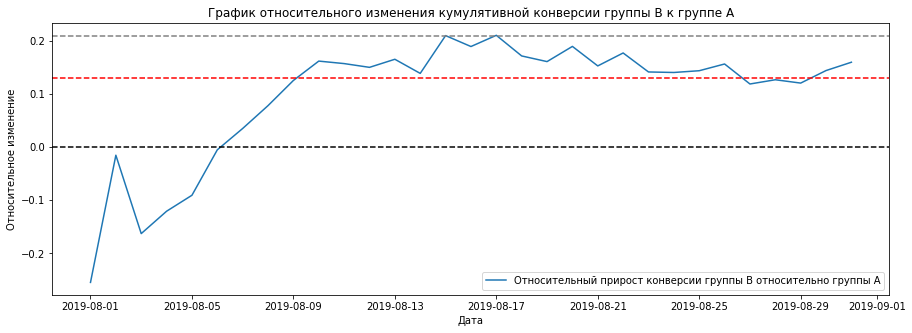

In [20]:
#собираем данные в одном датафрейме, добавляя приписку в виде названия группы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
#строим график относительного изменения кумулятивной конверсии группы B к группе A
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
#добавляем пунктирные линии оси
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.13, color='red', linestyle='--')
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

### Вывод

Перед нами график относительного изменения кумулятивной конверсии группы B к группе A.
С самого начала лидирует сегмент А, однако спустя несколько дней конверсия сегмента B резко растет и дохоходит до прироста в 21%, однако после чего опускается до уровня 10-15%, оставаясь при этом выше сегмента A. В целом сырые данные показывают, что практически по всем показателям сегмента B лидирует. Однако выбросы все же искажают данные. В связи с аномалиями появляются резкие точки роста и падения относительной конверсии, поскольку после резки точек роста идет спад, и наоборот после резких падений идет рост.

## 6. Построим точечный график количества заказов по пользователям. На основе графика сделаем выводы и предположения.

Для того, чтобы построить данный график, нам необходимо сгруппировать датасет `orders` по пользователям, рассчитамв для каждого пользователя количество заказов. Затем уже строим график, при этом определив ось X.

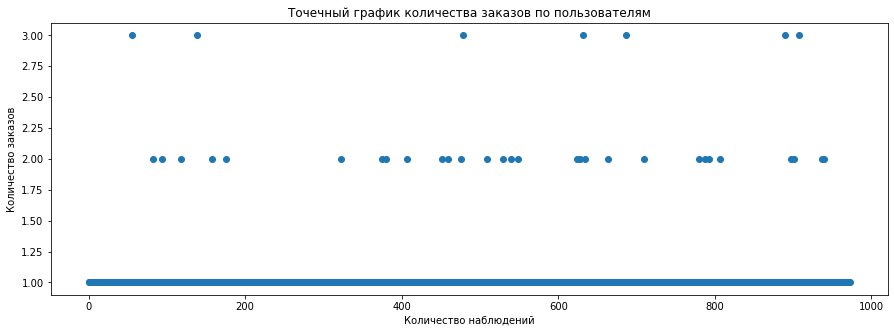

In [21]:
#рассчитываем для каждого пользователя количество заказов
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
#переименовываем столбцы для удобства
ordersByUsers.columns = ['visitor_id', 'orders']
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
#строим график
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Количество наблюдений")
plt.ylabel("Количество заказов")
plt.show()

### Вывод

Мы видим, что большинство пользователей имели 1-2 заказа. Заметно меньше пользователей имели 2 заказа. Больше 2 заказов - абсолютная редкость. Возможно выбросы начинаются свыше 3 заказов. Чтобы это проверить нужно рассчитать перцентили.

## 7. Построим 95-й и 99-й перцентили количества заказов на пользователя. На основе полученных данных выберем границу для определения аномальных пользователей.

Для рассчета перцентилей применяют метод percentile() библиотеки Numpy. Применим его, найдем аномальных пользователей и избавимся от них!

In [22]:
#считаем 95 и 99 перцентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

In [23]:
order_an = 2

### Вывод

Мы видим, что не более 5% пользователей совершили более 1 заказов и не более 1% пользователей совершили более 2 заказов.  Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Поэтому отсеим тех, кто сделал более 2 заказов, отсеив при этом  1% пользователей с аномально большим количеством заказов.

**Выбранная граница для определения аномальных пользователей** - `более 2 заказов`.

## 8. Построим точечный график стоимостей заказов.  На основе графика сделаем выводы и предположения.

Для того, чтобы построить точечный график стоимостей заказов, нам нужно определить ось X, а затем просто в качестве оси Y передать значения revenue

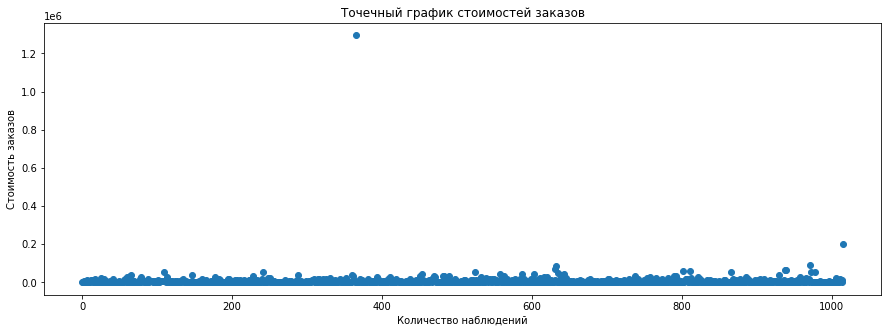

In [24]:
# серия из чисел от 0 до количества наблюдений orders
x_values = pd.Series(range(0, len(orders['revenue'])))
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
#строим график
plt.scatter(x_values, orders['revenue']) 
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Количество наблюдений")
plt.ylabel("Стоимость заказов")
plt.show()

### Вывод

Мы видим, что стоимость заказа свыше 200 тысяч условных единиц крайне редка. При этом видны аномально дорогие заказы, которые дороже средних в 5-6 раз, что двольно много. В целом это объясняет искажение результатов выше.

## 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. На основе полученных данных  выберем границу для определения аномальных пользователей.

Для рассчета перцентилей применяют метод percentile() библиотеки Numpy. Применим его, найдем аномальных пользователей и избавимся от них!

In [25]:
#считаем 95 и 99 перцентили
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

In [26]:
order_rev = 53904

### Вывод

Мы видим, что не более 5% пользователей сделало заказ на сумму свыше 26785 у.е., в то время как не более 1% пользователей сделало заказ на сумму свыше 53904 у.е.. Учитывая, что максимальная сумма заказа - свыше миллиона у.е., то аномалии очень сильно влияли на результаты. Выберем границу границу для определения аномальных пользователей в 53904 у.е.

**Выбранная граница для определения аномальных пользователей** - `более 53904 у.е.`.

## 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. На основе полученных данных сделаем выводы и предположения.


Сформулируем гипотезы. 

**Нулевая:** различий в конверсии между группами нет.

**Альтернативная:** различия в конверсии между группами есть.

Начнём с подготовки данных.

**Шаг 1.**
Сначала создадим датасеты с куммулятивным количеством пользователей для каждой из дат по группам

In [27]:
#ГРУППА A
#датасет с датой и количество посетителей для группы A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
#переименовываем столбцы для данного датасета
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#создаем датасет для расчета куммулятивныго количества посетителей для каждой из дат для группы A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1,)
#переименовываем столбцы для данного датасета
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


#ГРУППА B (проделываем все то же)
#датасет с датой и количество посетителей для группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
#переименовываем столбцы для данного датасета
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#создаем датасет для расчета куммулятивныго количества посетителей для каждой из дат для группы B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
#переименовываем столбцы для данного датасета
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

**Шаг 2.**
Теперь создадим датасеты с куммулятивными количеством заказов и выручкой для каждой из дат по группам

In [28]:
#ГРУППА A
#группируем данные по дате и для каждой даты рассчитываем количество уникальных заказов и сумму выручки для группы A
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
#переименовываем столбцы для данного датасета
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#создаем датасет, в котором будут рассчитаны куммулятивные количество заказов и выручка для каждой даты
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
.agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])
#переименовываем столбцы для данного датасета    
ordersACummulative.columns = [ 'date', 'ordersCummulativeA', 'revenueCummulativeA']


#ГРУППА B (проделываем все то же)
#группируем данные по дате и для каждой даты рассчитываем количество уникальных заказов и сумму выручки для группы B
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
#переименовываем столбцы для данного датасета
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#создаем датасет, в котором будут рассчитаны куммулятивные количество заказов и выручка для каждой даты
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
.agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
#переименовываем столбцы для данного датасета    
ordersBCummulative.columns = [ 'date', 'ordersCummulativeB', 'revenueCummulativeB',]

**Шаг 3.** Объединяем полученные датасеты в один

In [29]:
#объединяем полученные таблицы по дате
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

**Шаг 4.** Смотрим, что у нас получилось

In [30]:
#выводим первые 5 строк полученной таблицы
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Расшифруем значения столбцев:
    
- `date` — дата;


- `ordersPerDateA` — количество заказов в выбранную дату в группе A;


- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;


- `ordersPerDateB` — количество заказов в выбранную дату в группе B;


- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;


- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;


- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;


- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;


- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;


- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;


- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;


- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;


- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

**Шаг 5.**
Создаем переменные, в которые поместим пользователей и количество заказов для них. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


In [31]:
#ГРУППА A
#группируем пользователей из группы A и считаем количество уникальных заказов для каждого пользователя
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
#переименовываем столбцы
ordersByUsersA.columns = ['visitor_id', 'orders']


#ГРУППА B
#группируем пользователей из группы B и считаем количество уникальных заказов для каждого пользователя
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
#переименовываем столбцы
ordersByUsersB.columns = ['visitor_id', 'orders']

**Шаг 6.** Создаем Series, которые будут содержать нули для пользователей, не совершивших ни одного заказа

In [32]:
#пользователи из группы А, которые не совершили ни одного заказа
rowA =  pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name ='orders')
#пользователи из группы B, которые не совершили ни одного заказа
rowB =  pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name ='orders')

**Шаг 7.** Создаем Series, в которые войдут количество заказов для каждого пользователя, в том числе и для тех, кто не своершил ни одного заказа

In [33]:
#ГРУППА А
#создаем ряд, в котором будут представлены количество заказов для каждого пользователя, в т.ч. и нули
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     rowA], axis=0)

#ГРУППА B
#создаем ряд, в котором будут представлены количество заказов для каждого пользователя, в т.ч. и нули
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     rowA], axis=0)

**Шаг 8.** Считаем статистическую значимость различий в конверсии между группами по «сырым» данным. Проверяем нулевую гипотезу. Также посчитаем относительный прирост конверсии группы B.

In [34]:
alpha = 0.05  # критический уровень статистической значимости
#p-value
results = round(stats.mannwhitneyu(sampleA, sampleB)[1], 5)
print('p-значение: ', results)
#относительный прирост конверсии группы
growth = round((sampleB.mean() / sampleA.mean() - 1), 3)
print("Относительный прирост конверсии группы B.", growth)
#проверка гипотезы
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.00871
Относительный прирост конверсии группы B. 0.166
Отвергаем нулевую гипотезу: разница статистически значима


### Вывод

P-value меньше выбранного нами критического уровня статистической значимости в 0.05,потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Также p-value ниже 0.1 (составляет **0.0087**), поэтому можно говорить о том, что эти различия довольно явные и большие.

Относительный прирост конверсии группы B к конверсии группы A равен **16.6%**.



## 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. На основе полученных данных сделаем выводы и предположения.

Дополнительных объемных рассчетов здесь не понадобится. Воспользуемся уже готовысм данными из таблицы `orders`. Для этого вольмем столбец с `revenue` из каждой из групп и сравним их.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [35]:
alpha = 0.05  # критический уровень статистической значимости
#p-value
results = round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], 5)
print('p-значение: ', results)
#относительный прирост конверсии группы
growth = round((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1), 3)
print("Относительный прирост конверсии группы B.", growth)
#проверка гипотезы
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.82949
Относительный прирост конверсии группы B. 0.287
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### Вывод

P-value больше 0.05 (составляет целых **0.83**)  — статистически значимых отличий в среднем чеке между группами нет. Однако относительное различие среднего чека между сегментами составляет около **29%**, что довольно велико. Скорее всего результат искажают аномалии. Очень странно, что статистически значимых различий нет, а  относительное различие среднего чека между сегментами довольно велико. Нужно избавляться от аномалий.

## 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. На основе полученных данных сделаем выводы и предположения.


Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Напоминаем, что выбранная граница для определения аномальных пользователей -составляет `более 30000 у.е`. и `более 3 заказов`.

Создаем перменные для хранения аномальных пользователей. При этом перменные будут хранить не количество заказов или их стоимость, а id аномальных пользователей.

In [36]:
#пользователи с аномальным количество заказов
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > order_an]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > order_an]['visitor_id'],
    ],axis=0,)
#пользователи с аномально дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > order_rev]['visitor_id']
#все аномальные пользователи
abnormalUsers =pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

Создадим переменные для хранения не аномальных пользователей.

In [37]:
#пользователи для группы А без аномалий
good_usersA = ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders']
#пользователи для группы B без аномалий
good_usersB = ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders']

Теперь формируем ряды без выбросов

In [38]:
#количество заказов для неаномальных пользователей группы А
sampleAFiltered = pd.concat([good_usersA, rowA],axis=0,)
#количество заказов для неаномальных пользователей группы B
sampleBFiltered = pd.concat([good_usersB, rowB],axis=0,)

Считаем статистическую значимость различий в конверсии между группами по «сырым» данным. Проверяем нулевую гипотезу. Также посчитаем относительный прирост конверсии группы B.

In [39]:
alpha = 0.01  # критический уровень статистической значимости
#p-value
results = round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], 5)
print('p-значение: ', results)
#относительный прирост конверсии группы
growth = round((sampleBFiltered.mean() / sampleAFiltered.mean() - 1), 3)
print("Относительный прирост конверсии группы B:", growth)
#проверка гипотезы
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.00702
Относительный прирост конверсии группы B: 0.189
Отвергаем нулевую гипотезу: разница статистически значима


### Вывод

P-value меньше выбранного нами критического уровня статистической значимости в 0.05,потому нулевую гипотезу отвергаем. Как и в случае с сырыми данными анализ отфильтрованныех данных нам сообщает, что в конверсии между группами есть статистически значимые различия. Также p-value ниже 0.1 (составляет **0.007**), поэтому можно говорить о том, что эти различия довольно явные и большие.

Относительный прирост конверсии группы B к конверсии группы A равен **18.9%**, что довольно много.

Результаты по конверсии практически не изменились.

## 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. На основе полученных данных сделаем выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Отфильтруем датасет `orders`, убрав аномалии.

In [40]:
#неаномальные пользователи группы А
filtr_ordersA = (orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id']
                                                                             .isin(abnormalUsers)))]['revenue'])
#неаномальные пользователи группы B
filtr_ordersB = (orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id']
                                                                             .isin(abnormalUsers)))]['revenue'])

In [41]:
alpha = 0.05  # критический уровень статистической значимости
#p-value
results = round(stats.mannwhitneyu(filtr_ordersA, filtr_ordersB)[1], 5)
print('p-значение: ', results)
#относительный прирост конверсии группы
growth = round((filtr_ordersB.mean()/filtr_ordersA.mean()-1), 3)
print("Относительный прирост конверсии группы B.", growth)
#проверка гипотезы
if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.7877
Относительный прирост конверсии группы B. -0.032
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


### Вывод

P-value, как и в случае с сырыми данными, больше 0.05 (составляет целых **0.78**)  — статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами составляет около 3% с проигрышем группы B.
P-value увеличился, но и разница между сегментами сократилась с 25% до 3%.

Поэтому можно говорить, что статистически значимых отличий в среднем чеке между группами нет.

## 14. Принимаем решение по результатам теста и объясняем его.

Что мы имеем в итоге?

Имеющиеся факты:

- Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;


Посмотрим на графики отфильтрованных данных.

In [42]:
#отфильтрованные пользователи
orders2 = orders.query('visitor_id not in @abnormalUsers')

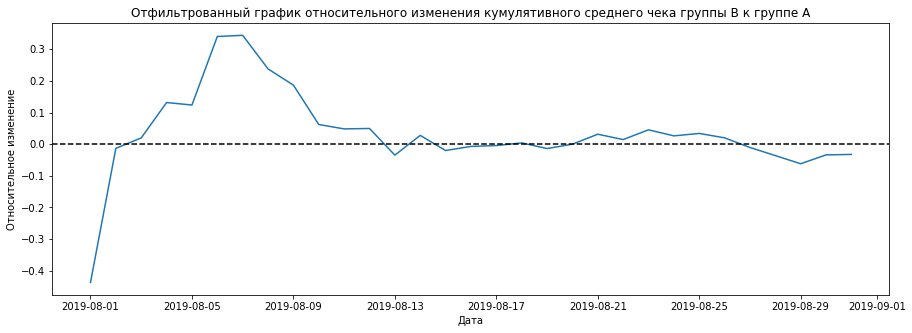

In [43]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
#создаем датасет с уникальными парами даты и группы
datesGroups2 = orders2[['date', 'group']].drop_duplicates()
#получаем кумулятивную выручку, количество заказов и пользователей для каждой даты и группы
ordersAggregated2 = datesGroups2.apply(lambda x: 
                                     orders2[np.logical_and(orders2['date'] <= x['date'], orders2['group'] == x['group'])].agg(
        {'date': 'max','group': 'max','transaction_id': 'nunique','visitor_id': 'nunique','revenue': 'sum',}),
                                     axis=1,).sort_values(by=['date', 'group'])

#получаем кумулятивное количество посетителей
visitorsAggregated2 = datesGroups2.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), 
                                       axis=1,).sort_values(by=['date', 'group'])
#объединяем датасеты
cumulativeData2 = ordersAggregated2.merge(
    visitorsAggregated2, on=['date', 'group'])
#переименовываем столбцы
cumulativeData2.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA2 = cumulativeData2[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB2 = cumulativeData2[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# собираем данные в одном датафрейме, добавляя приписку в виде названия группы
mergedCumulativeRevenue2 = cumulativeRevenueA2.merge(cumulativeRevenueB2, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue2['date'], (mergedCumulativeRevenue2['revenueB']/mergedCumulativeRevenue2['ordersB'])/(mergedCumulativeRevenue2['revenueA']/mergedCumulativeRevenue2['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("Отфильтрованный график относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

График различия среднего чека говорит о том, что результаты группы B крайне редко были выше, чем результаты группы B, а на данный момент они ниже на 2-3%. 
 

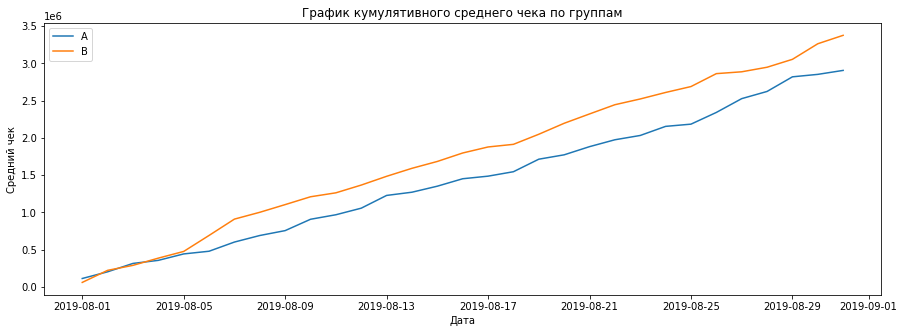

In [44]:
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA2['date'], cumulativeRevenueA2['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB2['date'], cumulativeRevenueB2['revenue'], label='B')

plt.legend() 
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.show()

В отфильтрованных данных выручка группы B слегка выше выручки группы A, но различия незначительные.

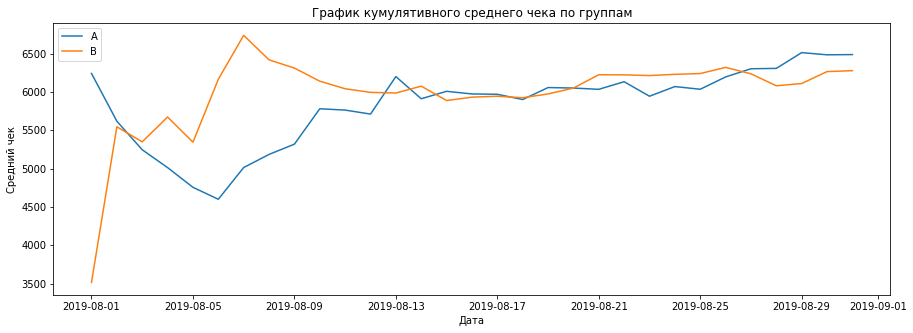

In [45]:
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
#делим выручку на количество заказов для каждой даты в группе A
plt.plot(cumulativeRevenueA2['date'], cumulativeRevenueA2['revenue']/cumulativeRevenueA2['orders'], label='A')
#делим выручку на количество заказов для каждой даты в группе B
plt.plot(cumulativeRevenueB2['date'], cumulativeRevenueB2['revenue']/cumulativeRevenueB2['orders'], label='B')
plt.legend() 
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.show()

График кумулятивного среднего чека по группам при фильтрации показывает нам, что группа B и группа A имеют сходные чеки (группа B слегка уступает группе A)

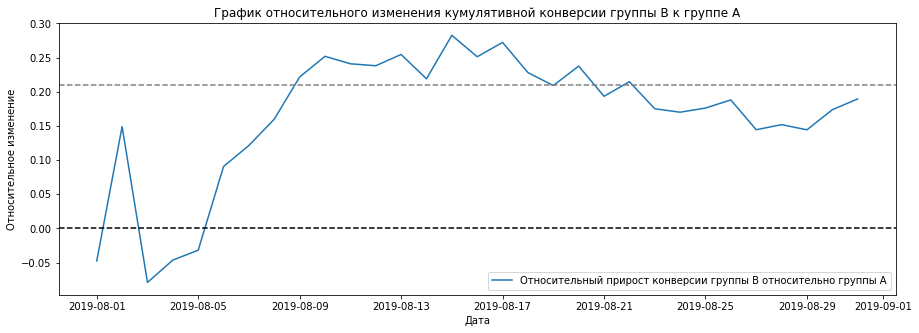

In [46]:
# считаем кумулятивную конверсию
cumulativeData2['conversion'] = cumulativeData2['orders']/cumulativeData2['visitors']

# отделяем данные по группе A
cumulativeDataA2 = cumulativeData2[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB2 = cumulativeData2[cumulativeData['group']=='B']
#собираем данные в одном датафрейме, добавляя приписку в виде названия группы
mergedCumulativeConversions2 = cumulativeDataA2[['date','conversion']].merge(cumulativeDataB2[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# задаём сетку отрисовки графиков
plt.figure(figsize=(15, 5))
#строим график относительного изменения кумулятивной конверсии группы B к группе A
plt.plot(mergedCumulativeConversions2['date'], mergedCumulativeConversions2['conversionB']/mergedCumulativeConversions2['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
#добавляем пунктирные линии оси
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Относительное изменение")
plt.show()

Что же до графика различия конверсии, то она у группы B лучше на процентов 15% и только в начале была ниже, чем конверсия группы A.

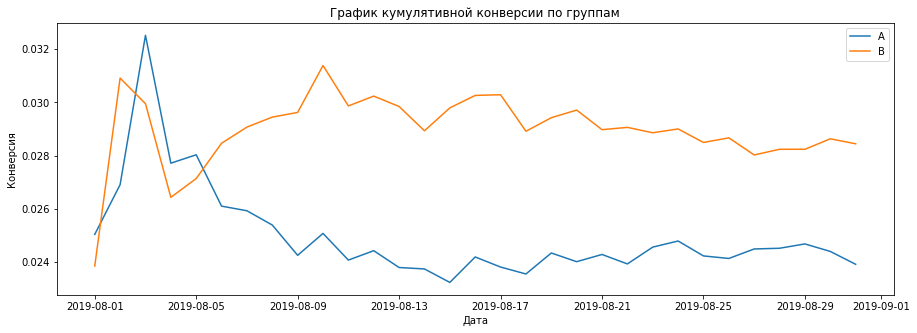

In [47]:
plt.figure(figsize=(15, 5))
# строим графики
plt.plot(cumulativeDataA2['date'], cumulativeDataA2['conversion'], label='A')
plt.plot(cumulativeDataB2['date'], cumulativeDataB2['conversion'], label='B')
plt.legend()
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.show()


На графике видно доминирование группы B. Группа A имеет крайне плоху конверсию.

### Вывод

Так мы видим, что:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий (лидерство группы B).
- Нет статистически значимых различий по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий.
- График различия конверсий говорит о том, что результаты группы B лучше группы A 
- График различия средних чеков говорит о том, что результаты группы B примерно равны результатам группы A.

Если говорить о дальнейшей судьбе A/B-теста, то можно, конечно, его продолжить, чтобы понять, что будет со средним чеком у группы B, хотя в целом предполагается, что он останется на одном и том же уровне (будет равен среднему чеку группы A).

И если рассуждать логически, то мы имеем в группе B преимущество по конверсии на 15% и одинаковые результаты среднего чека. Так мы получаем то, что среднний чек покупателей останется неизменным, но количество покупаетелей увеличится на 15%, что в конечно итоге принесет интернет-магазину большу прибыль. Поэтому логично было бы остановить тест, зафиксировава победу группы B. Однако, если интернет-магазину нужен рост среднего чека, то лучше продолжить тест и посмотреть, как будет вести себя группа B.

# Общий вывод

В ходе анализа мы пришли к следующим выводам:

1) Нашли самые перспективные гипотезы. По результатам проверки двумя методами (ICE, RICE) ими являются гипотезы 8 и 1.

2) Нашли самые неперспективные гипотезы. По результатам проверки двумя методами (ICE, RICE) ими являются гипотезы 5 и 6.

3) Проанализировали результаты A/B-теста и пришли к выводу о том, что средний чек у двух групп одинаков, в то время как конверсия группы B выше на 15%, что в принципе означает, что пользователи магазина чаще становятся покупателями и приносят прибыль. Поэтому предлагается завершить тест в пользу группы B, однако если интернет-магазин посчитает, что необходимо преимущество по обоим критериям, то предлагается продолжить тестирование.